In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from ico import *

In [2]:
# Parameters
POPULATION_SIZE = 100
GENERATIONS = 5000
MUTATION_RATE = 0.3
ELITISM = 2

In [3]:
def create_initial_solution(state):
    customers = list(range(1, len(state["orders"])))
    random.shuffle(customers)
    solution = [0]
    capacity = q
    for customer in customers:
        if capacity < state["orders"][customer]:
            solution.append(0)
            capacity = q
        solution.append(customer)
        capacity -= state["orders"][customer]
    solution.append(0)
    return solution

In [4]:
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(1, size - 1), 2))
    child = [-1] * size
    child[start:end] = parent1[start:end]

    pos = end
    for gene in parent2:
        if gene not in child:
            while child[pos] != -1:
                pos = (pos + 1) % size
            child[pos] = gene
    return child

In [5]:
def swap_mutation(solution):
    if random.random() < MUTATION_RATE:
        idx1, idx2 = random.sample(range(1, len(solution) - 1), 2)
        solution[idx1], solution[idx2] = solution[idx2], solution[idx1]
    return solution

def inversion_mutation(solution):
    if random.random() < MUTATION_RATE:
        start, end = sorted(random.sample(range(1, len(solution) - 1), 2))
        solution[start:end] = solution[start:end][::-1]
    return solution

In [6]:
def tournament_selection(population, fitness_values, tournament_size=5):
    tournament_indices = random.sample(range(len(population)), tournament_size)
    best_idx = min(tournament_indices, key=lambda i: fitness_values[i])
    return population[best_idx]

def roulette_selection(population, fitness_values):
    inverse_fitness = 1 / (np.array(fitness_values) + 1e-6)
    probabilities = inverse_fitness / np.sum(inverse_fitness)
    return population[np.random.choice(len(population), p=probabilities)]

In [7]:
def genetic_algorithm(state, population_size, generations, mutation_rate, selection_method='tournament', mutation_method='swap'):
    global MUTATION_RATE
    MUTATION_RATE = mutation_rate

    distance_matrix = compute_distance_matrix(state)
    population = [create_initial_solution(state) for _ in range(population_size)]
    fitness_values = np.array([fitness(state, sol, distance_matrix) for sol in population])

    for generation in range(generations):
        sorted_indices = np.argsort(fitness_values)
        population = [population[i] for i in sorted_indices]
        fitness_values = fitness_values[sorted_indices]

        new_population = population[:ELITISM]
        new_fitness_values = list(fitness_values[:ELITISM])

        while len(new_population) < population_size:
            parent1 = tournament_selection(population, fitness_values) if selection_method == 'tournament' else roulette_selection(population, fitness_values)
            parent2 = tournament_selection(population, fitness_values) if selection_method == 'tournament' else roulette_selection(population, fitness_values)

            child = crossover(parent1, parent2)
            child = swap_mutation(child) if mutation_method == 'swap' else inversion_mutation(child)
            new_population.append(child)
            new_fitness_values.append(fitness(state, child, distance_matrix))

        population = new_population
        fitness_values = np.array(new_fitness_values)

    best_idx = np.argmin(fitness_values)
    return population[best_idx], fitness_values[best_idx]

In [13]:
def plot_parameter_impact(state):
    population_sizes = [10, 50, 200]
    generations_list = [20, 100, 1000]
    mutation_rates = [0.1, 0.3]

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    fitness_results = []
    for population_size in population_sizes:
        best_solution, best_fitness = genetic_algorithm(state, population_size, 5000, 0.3)
        fitness_results.append(best_fitness)
    axes[0].plot(population_sizes, fitness_results, marker='o')
    axes[0].set_title("Impact de la taille de la population")
    axes[0].set_xlabel("Population Size")
    axes[0].set_ylabel("Fitness Score")

    print("1")

    fitness_results = []
    for generations in generations_list:
        best_solution, best_fitness = genetic_algorithm(state, 100, generations, 0.15)
        fitness_results.append(best_fitness)
    axes[1].plot(generations_list, fitness_results, marker='o')
    axes[1].set_title("Impact du nombre de générations")
    axes[1].set_xlabel("Generations")
    axes[1].set_ylabel("Fitness Score")

    print("2")

    fitness_results = []
    for mutation_rate in mutation_rates:
        best_solution, best_fitness = genetic_algorithm(state, 100, 3000, mutation_rate)
        fitness_results.append(best_fitness)
    axes[2].plot(mutation_rates, fitness_results, marker='o')
    axes[2].set_title("Impact du taux de mutation")
    axes[2].set_xlabel("Mutation Rate")
    axes[2].set_ylabel("Fitness Score")

    print("3")

    plt.show()

In [14]:
# State de test
test_state = {"position": [(0, 0), (5, 2), (3, -3), (2, 2), (1, 0), (3, 3), (2, 1), (-5, 0), (7, 1), (-3, -2), (5, 1), (1, 2), (4, 2)], "orders": [0, 5, 10, 7, 8, 6, 9, 4, 3, 1, 2, 3, 7]}

Best Solution: [0, 4, 10, 8, 1, 12, 0, 2, 6, 9, 7, 5, 0, 11, 3, 0]
Fitness Score: 200.70757442512826


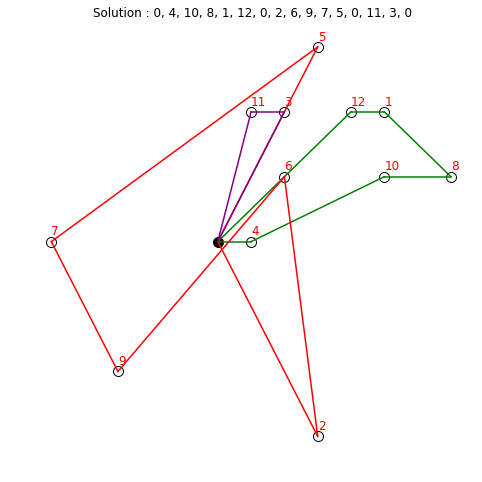

In [10]:
# Affichage et comparaisons
best_solution, best_fitness = genetic_algorithm(test_state, 50, 500, 0.3, selection_method='roulette', mutation_method='inversion')
print("Best Solution:", best_solution)
print("Fitness Score:", best_fitness)
plot_solution(test_state, best_solution)

aaaa
1
2
3


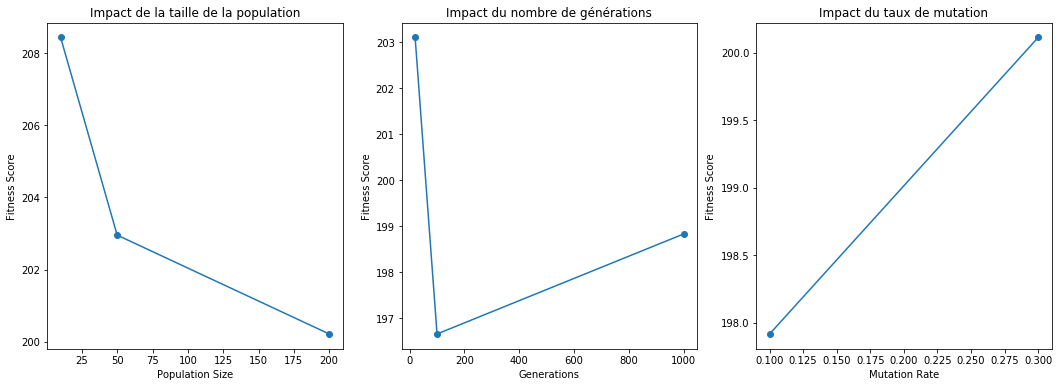

In [15]:
plot_parameter_impact(test_state)

sds
